In [2]:
import numpy as np
from numpy import *
from pylab import *
from math import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os 
import random 
import pandas as pd
import glob
from astropy.io import ascii
import itertools
from datetime import datetime

# Scipy
import scipy
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.interpolate import interp1d


# Extinction
from extinction import apply, remove
from extinction import fitzpatrick99 as f99


path = os.getcwd()

### Determinación de E(B-V)  

Primero se hace una interpolación entre el ratio de flujos de Ha/Hb y el exceso de color.

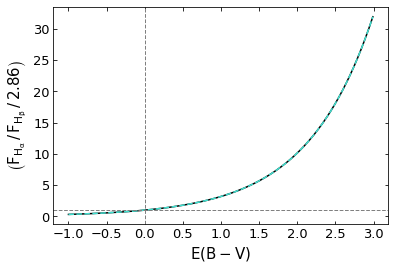

In [5]:
# Determinación de interpolación entre rat y ebv

wave = np.array([4861.,6563.])   
flux = [1.,2.86]
ebv = np.array(list(range(-100,300)))*0.01
rat = ebv*0.


# Por cada valor de ebv (entre -1 y 2.99) se elimnina la extinción 
# de los valores de flujo 1 y 2.86 para Hb y Ha, respectivamente,
# y se halla el ratio entre ellos

for i in list(range(400)):
    fcor = remove(f99(wave,-3.1*ebv[i], 3.1), flux)
    rat[i] = fcor[1]/fcor[0]
    
    
# Se crea la función de interpolación entre esos valores de ebv y ratio
inter_ratebv = interp1d(rat, ebv)


# Plot de rat vs ebv y rat vs la interpolación

fig, ax = plt.subplots()
plt.plot(ebv, rat/2.86, color = 'k', lw = 1.5);
plt.plot(inter_ratebv(rat), rat/2.86, color = 'turquoise', lw = 1.5, ls='dashed');
plt.xlabel(r'$\rm{E(B-V)}$', fontsize=15, fontfamily='serif');
plt.ylabel(r'$\rm{\left(F_{H_{\alpha}} \, / \, F_{H_{\beta}} \, / \, 2.86 \right)}$', fontsize=15, fontfamily='serif');
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')
plt.axvline(0., color = 'grey', ls = '--', lw = 1.0);
plt.axhline(1.0, color = 'grey', ls = '--', lw = 1.0);
plt.show()


Con esta interpolación y conociendo los flujos de Halfa y Hbeta se determina la extinción de la galaxia para cada Cefeida mediante un método Montecarlo realizando un ajuste normal para N = 50000 valores del ratio aleatorios dentro del rango del error.

Después, se realiza otro MC para determinar el flujo corregido y los errores de estos.


Cefeida 0
Ratio medido: 2.86
EBV: 0.0


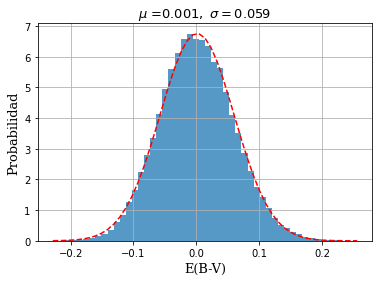


Línea de emisión Hbeta

Flujo: 4.3113453967966793e-16
Error: 8.555906538571626e-17


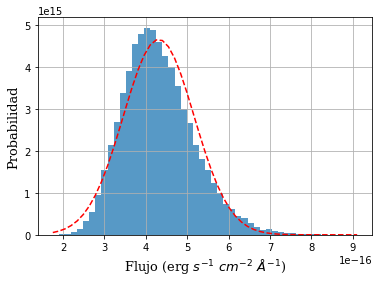


Línea de emisión OIII

Flujo: 2.82012248428348e-16
Error: 5.367843154526237e-17


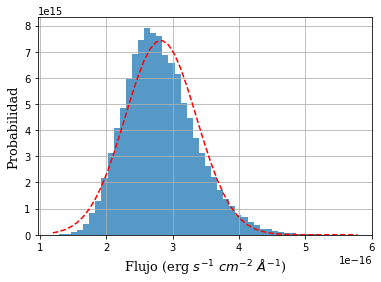


Línea de emisión Halfa

Flujo: 8.29213799453345e-16
Error: 1.0676370102702678e-16


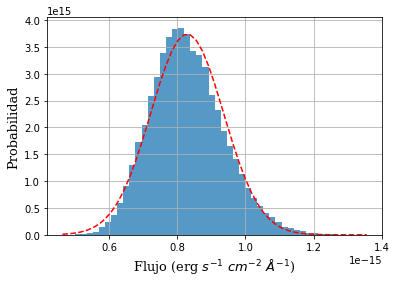


Línea de emisión NII

Flujo: 4.842172775993057e-16
Error: 6.205512774816836e-17


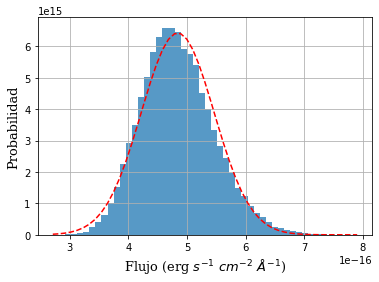


////////////////////////////////////////////////////

Cefeida 1
Ratio medido: 4.148009812791068
EBV: 0.3210069266728654


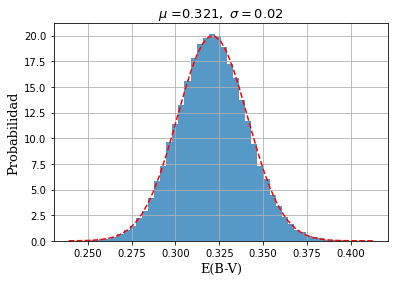


Línea de emisión Hbeta

Flujo: 4.544179040018888e-15
Error: 3.0251442230061664e-16


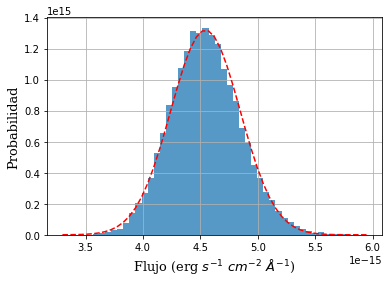


Línea de emisión OIII

Flujo: 1.510384692127078e-15
Error: 9.649949327895559e-17


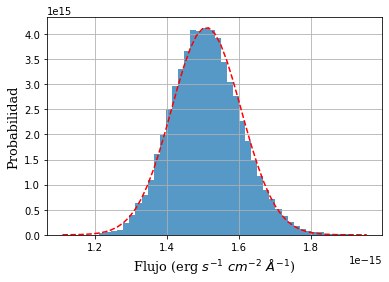


Línea de emisión Halfa

Flujo: 1.2977739550276333e-14
Error: 5.630216853001167e-16


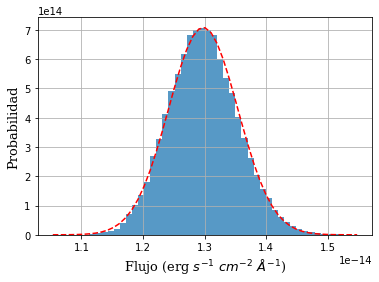


Línea de emisión NII

Flujo: 5.585240558108709e-15
Error: 2.411909856146316e-16


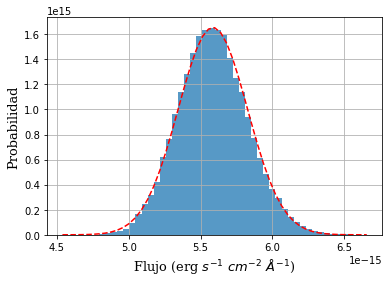


////////////////////////////////////////////////////

Cefeida 2
Ratio medido: 3.744410834155241
EBV: 0.23262121956371057


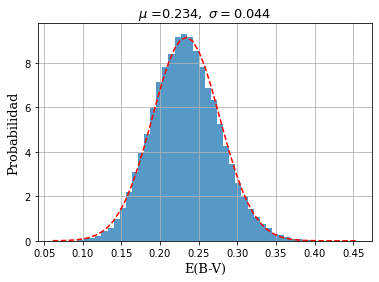


Línea de emisión Hbeta

Flujo: 1.1594540948283088e-15
Error: 1.691238738589291e-16


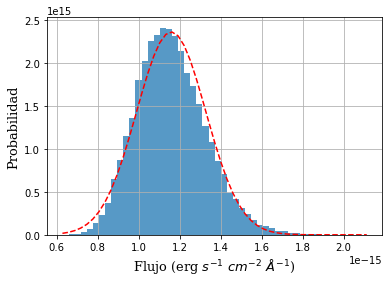


Línea de emisión OIII

Flujo: 4.007473536433472e-16
Error: 5.608404941759546e-17


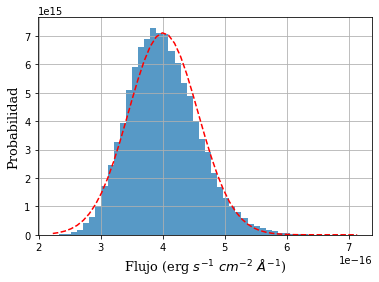


Línea de emisión Halfa

Flujo: 3.2917409403658437e-15
Error: 3.1224054017379584e-16


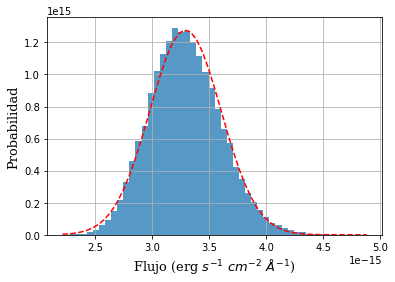


Línea de emisión NII

Flujo: 1.4188743102187728e-15
Error: 1.3396602126100765e-16


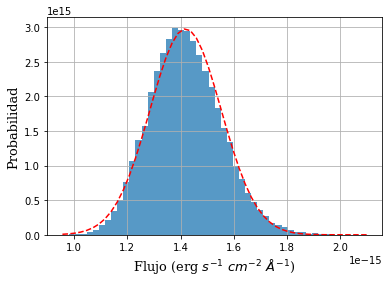


////////////////////////////////////////////////////

Cefeida 3
Ratio medido: 2.9265707948797917
EBV: 0.019865468430673116


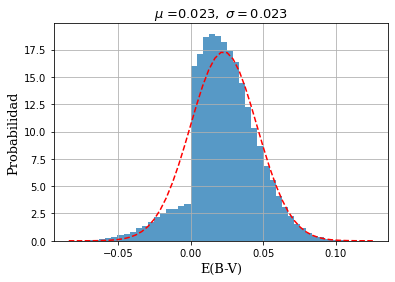


Línea de emisión Hbeta

Flujo: 1.2419427054395227e-15
Error: 9.530158488302514e-17


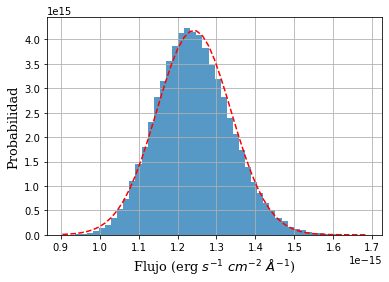


Línea de emisión OIII

Flujo: 4.352922291645863e-16
Error: 3.205624797879864e-17


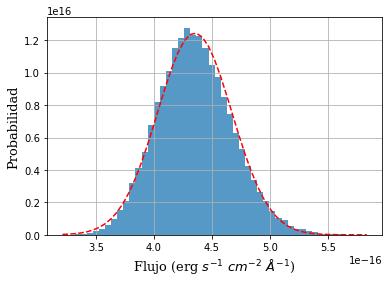


Línea de emisión Halfa

Flujo: 3.534095884689203e-15
Error: 1.7668879018803997e-16


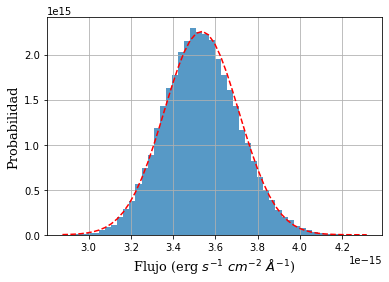


Línea de emisión NII

Flujo: 1.5297444705555749e-15
Error: 7.612756357347953e-17


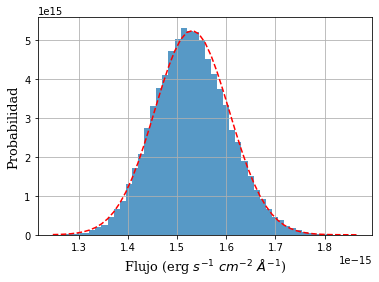


////////////////////////////////////////////////////

Cefeida 4
Ratio medido: 3.345893953810224
EBV: 0.13546118254272133


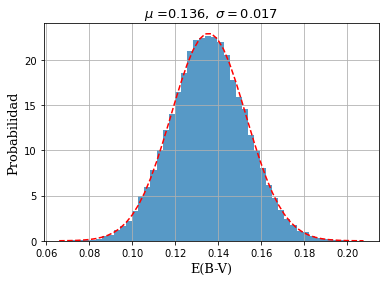


Línea de emisión Hbeta

Flujo: 1.818911338705373e-15
Error: 1.060106193905837e-16


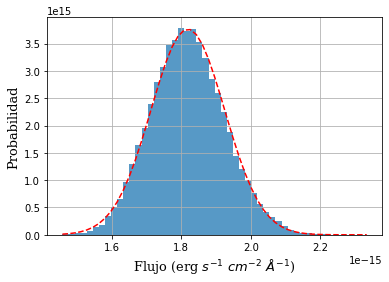


Línea de emisión OIII

Flujo: 1.0157729719116178e-15
Error: 5.681900617039954e-17


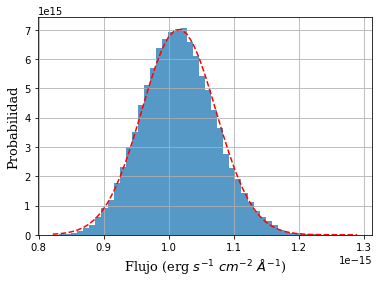


Línea de emisión Halfa

Flujo: 5.196270834398737e-15
Error: 1.974046410445185e-16


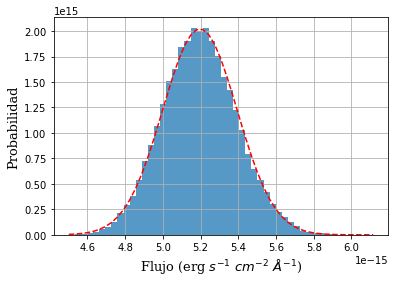


Línea de emisión NII

Flujo: 2.3544680149018177e-15
Error: 8.903323438758096e-17


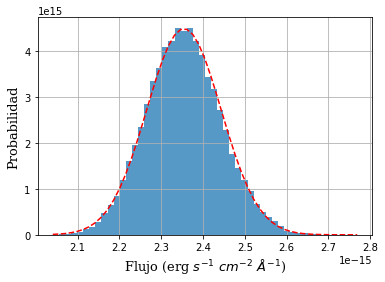


////////////////////////////////////////////////////

Flujos: [[4.31134540e-16 2.82012248e-16 8.29213799e-16 4.84217278e-16]
 [4.54417904e-15 1.51038469e-15 1.29777396e-14 5.58524056e-15]
 [1.15945409e-15 4.00747354e-16 3.29174094e-15 1.41887431e-15]
 [1.24194271e-15 4.35292229e-16 3.53409588e-15 1.52974447e-15]
 [1.81891134e-15 1.01577297e-15 5.19627083e-15 2.35446801e-15]]

Erorres: [[8.55590654e-17 5.36784315e-17 1.06763701e-16 6.20551277e-17]
 [3.02514422e-16 9.64994933e-17 5.63021685e-16 2.41190986e-16]
 [1.69123874e-16 5.60840494e-17 3.12240540e-16 1.33966021e-16]
 [9.53015849e-17 3.20562480e-17 1.76688790e-16 7.61275636e-17]
 [1.06010619e-16 5.68190062e-17 1.97404641e-16 8.90332344e-17]]


In [6]:
os.chdir(path+'\\adjusted_spectrum')    
os.getcwd()


Hbeta=4861
OIII=5007
Halfa=6563
NII=6583

# Se obtienen los flujos de cada línea en un array (diferente nombre a las longitudes de onda)

Ha = []; e1Ha = []; e2Ha = []; 
Hb = []; e1Hb = []; e2Hb = []; 
O3 = []; e1O3 = []; e2O3 = []; 
N2 = []; e1N2 = []; e2N2 = []
with open('flujos.txt','r') as flujo:
        flujo = flujo.readlines()[1:50]  
        for linea in flujo:
            linea = np.array(linea.split())
            Ha.append(linea[1])
            e1Ha.append(linea[2])
            e2Ha.append(linea[3])
            Hb.append(linea[4])
            e1Hb.append(linea[5])
            e2Hb.append(linea[6])
            O3.append(linea[7])
            e1O3.append(linea[8])
            e2O3.append(linea[9])
            N2.append(linea[10])
            e1N2.append(linea[11])
            e2N2.append(linea[12])
        Ha = np.array(Ha)
        e1Ha = np.array(e1Ha)
        e2Ha = np.array(e2Ha)
        Hb = np.array(Hb)
        e1Hb = np.array(e1Hb)
        e2Hb = np.array(e2Hb)
        O3 = np.array(O3)
        e1O3 = np.array(e1O3)
        e2O3 = np.array(e2O3)
        N2 = np.array(N2)
        e1N2 = np.array(e1N2)
        e2N2 = np.array(e2N2)


lineas = np.array([Hbeta,OIII,Halfa,NII])
lin_emis = ['Hbeta', 'OIII', 'Halfa', 'NII']
 
    
### Se determina EBV con su error usando un Método Monte Carlo
    
    
EBV = []
EBV_err = []
flux_final = np.zeros(len(lineas))
err_final = np.zeros(len(lineas))
for i in range(len(Ha)):
    
    flux = np.array([float(Hb[i]),float(O3[i]),float(Ha[i]),float(N2[i])])
    
    print('\nCefeida',i)
    Ha_ = np.float(Ha[i])
    e1 = np.float(e1Ha[i])
    e2 = np.float(e2Ha[i])
    s_Ha = (e1+e2)/2
    
    Hb_ = np.float(Hb[i])
    e1_Hb = np.float(e1Hb[i])
    e2_Hb = np.float(e2Hb[i])
    s_Hb = (e1+e2)/2
    
    
    # Valores sin MC
    ratio_med = Ha_/Hb_   
    if ratio_med < 2.86:
        ratio_med = 2.86
    ebv_medido = inter_ratebv(ratio_med)
    print('Ratio medido:',ratio_med)
    print('EBV:', ebv_medido)
    
    
    # Se determina EBV para 50000 ratios Ha/Hb aleatorios dentro de los rangos Flujo +/- error
    
    N = 50000
    
    ebv = []
    for j in range(N):  
        rat = np.random.normal(Ha_, s_Ha)/np.random.normal(Hb_, s_Hb)
        if rat < 2.86:
            rat = np.random.normal(2.86, s_Ha*2.86/Ha_)/np.random.normal(1, s_Hb/Hb_)
        inter = inter_ratebv(rat) 
        ebv.append(inter)
    ebv = np.array(ebv)
    
    # Se halla la media y la desviación típica de todos los EBV calculados, y se hace un ajuste normal
    mu, sigma = scipy.stats.norm.fit(ebv)
    num_bins = 50 
    n, bins, patches = plt.hist(ebv, num_bins,density=1, alpha=0.75) 
    y = norm.pdf (bins, mu, sigma) 
     
    plt.grid(True)
    plt.plot(bins, y, 'r--') 
    plt.xlabel('E(B-V)', fontfamily='serif', fontsize = 13) 
    plt.ylabel('Probabilidad', fontfamily='serif', fontsize = 13) 
    plt.title('$\mu $ =' + str (round (mu, 3)) + '$, \,\, \sigma = $' + str (round (sigma, 3)), fontsize = 13) 
    plt.show()
    
    EBV.append(mu)
    EBV_err.append(sigma)
    
    
###Se aplica este EBV con otro Monte Carlo para determinar el error de los flujos corregidos

    # Con 50000 valores de EBV dentro del rango EBV +/- error se determinan los flujos corregidos
    out = []
    for k in range(N):    
        ebv = np.random.normal(mu, sigma) 
        flux_cor=apply(f99(lineas,-3.1*ebv,3.1),flux)
        out.append(flux_cor)
    out = np.array(out)
    
    # Para cada línea de emisión se determina la media y la desviación típica
    flux_i = []
    err_i = []
    for s in range(len(out[0,:])):
        print('\nLínea de emisión',lin_emis[s])
        
        num_bins = 50 
        mu, sigma = scipy.stats.norm.fit(out[:,s])
        n, bins, patches = plt.hist(out[:,s], num_bins, density=1, alpha=0.75) 
        y = norm.pdf (bins, mu, sigma)
        
        print('\nFlujo:', mu)
        print('Error:', sigma)
        plt.grid(True)
        plt.xlabel(r'Flujo (erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)', fontfamily='serif', fontsize = 13) 
        plt.ylabel('Probabilidad', fontfamily='serif', fontsize = 13) 
        plt.plot(bins, y, 'r--')  
        plt.show()
        
        flux_i.append(mu)
        err_i.append(sigma)

    
    flux_i = np.array(flux_i)
    err_i = np.array(err_i)
    flux_final = np.vstack((flux_final,flux_i))
    err_final = np.vstack((err_final,err_i))
        
    print('\n////////////////////////////////////////////////////')
    
EBV = np.array(EBV)
EBV_err = np.array(EBV_err)
   
flux_final = np.delete(flux_final, 0, axis=0)
err_final = np.delete(err_final, 0, axis=0)
print('\nFlujos:',flux_final)
print('\nErorres:',err_final)
   

### Calculo de metalicidades

La metalicidad se calcula como:

                                     12 + log(O/H) = 8.73 - 0.32 *O3N2
                   
Siendo O3N2:

                                     O3N2 = log(OIII/Hb) - log(NII/Ha)

Esto es realmente la abundancia del oxígeno, pero se puede aproximar la metalicidad así (Pettini 2004, https://arxiv.org/pdf/astro-ph/0401128.pdf). Los errores se propagan como:

                      error = sqrt( (error_OIII/ln(10)*OIII)^2 + (- error_Hb/ln(10)*Hb)^2 
                              +(- error_NII/ln(10)*NII)^2 +(error_Ha/ln(10)*Ha)^2  )

Finalmente se abre el archivo con las metalicidades de SH0ES que se creó anteriormente para eliminar los espectros que se han descartado y volver a guardarlo individualmente por galaxia.

In [9]:
met=[]
err_met=[]

for i in range(len(Ha)):
    Hbc = flux_final[i,0]
    OIIIc = flux_final[i,1] 
    Hac = flux_final[i,2]
    NIIc = flux_final[i,3]

    O3N2 = math.log((OIIIc/Hbc),10) - math.log((NIIc/Hac),10)
    
    print(O3N2)
    m = 8.73 - 0.32 * O3N2
    met.append(m)
    
    ## Propagación de errores
    e_Hbc = err_final[i,0]
    e_OIIIc = err_final[i,1] 
    e_Hac = err_final[i,2]
    e_NIIc = err_final[i,3]

    # errores O3N2
    err_O3N2 = sqrt( (e_OIIIc/(np.log(10)*OIIIc))**2 + (e_Hbc/(np.log(10)*Hbc))**2 
                     + (e_NIIc/(np.log(10)*NIIc))**2  + (e_Hac/(np.log(10)*Hac))**2 )

    # errores 12+log(OH)
    err_m = 0.32*err_O3N2
    err_met.append(err_m)
    

met=np.array(met)
err_met=np.array(err_met)

print('\nMetalicidad S. Muñoz (PP04):', met)
print('errores:', err_met)


## Archivo SH0ES
m_Riess=[]
with open(path+"/emited_spectrum/m_Riess.txt", "r") as m:
    data = m.readlines()   
    for linea in data:
        linea=np.array(linea.split())
        m_Riess.append(float(linea))
m_Riess=np.array(m_Riess)
m_Riess=np.delete(m_Riess, (1,2,3,6,7,8,10,11,13)) # Se eliminan las de los espectros que descartamos
print()
print('Metalicidad Riess (Z94):', m_Riess)


os.chdir(path)   
os.getcwd()         
np.savetxt('err_met_3021.txt', err_met)
np.savetxt('met_3021.txt', met)
np.savetxt('met_3021_Riess.txt', m_Riess)

0.04928139321767269
-0.11221068780145549
-0.09590117214672356
-0.09166121053486936
0.09078410632956263

Metalicidad S. Muñoz (PP04): [8.71422995 8.76590742 8.76068838 8.75933159 8.70094909]
errores: [0.04580114 0.01538841 0.03369214 0.01773639 0.01347328]

Metalicidad Riess (Z94): [8.972 9.197 9.045 9.166 9.089]
